# Imports

In [ ]:
!pip install LexRank
!pip install bert-score
!pip install textstat
import nltk
!pip install wordcloud

nltk.download('punkt_tab')
!pip install rouge_score

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import meteor_score
import numpy as np
import random
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from lexrank import LexRank
from lexrank.mappings.stopwords import STOPWORDS
from bert_score import score
import textstat
from nltk.tokenize import word_tokenize
import numpy as np
import networkx as nx
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import pandas as pd
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive

In [ ]:
pd.set_option('display.max_colwidth', None)


In [ ]:
!unzip /content/drive/MyDrive/bullet_points_one.zip -d /content/unzipped_files


In [ ]:
!ls /content/unzipped_files


news  summaries


In [ ]:
!ls /content/unzipped_files/news

Articles


In [ ]:
!ls /content/unzipped_files/summaries

Summaries


In [ ]:
!ls /content/unzipped_files/news/Articles

business  entertainment  politics  sport  tech


In [ ]:
base_dir = "/content/unzipped_files"

print("Contents of /content/unzipped_files:")
print(os.listdir(base_dir))
print()

print("Contents of /content/unzipped_files/news:")
print(os.listdir(os.path.join(base_dir, "news")))
print()

print("Contents of /content/unzipped_files/summaries:")
print(os.listdir(os.path.join(base_dir, "summaries")))


Contents of /content/unzipped_files:
['summaries', 'news']

Contents of /content/unzipped_files/news:
['Articles']

Contents of /content/unzipped_files/summaries:
['Summaries']


In [ ]:
# Base paths for news and summaries
news_dir = "/content/unzipped_files/news/Articles"
summaries_dir = "/content/unzipped_files/summaries/Summaries"

# If you know the 5 theme folders exactly:
themes = ["business", "entertainment", "politics", "sport", "tech"]

# Initialize a list to hold row dictionaries
data_rows = []

for theme in themes:
    # Construct the theme-specific folder paths
    news_theme_path = os.path.join(news_dir, theme)
    summary_theme_path = os.path.join(summaries_dir, theme)

    # Check that these paths exist
    if os.path.isdir(news_theme_path) and os.path.isdir(summary_theme_path):
        # Loop through all files in the news theme folder
        for txt_file in os.listdir(news_theme_path):
            if txt_file.endswith(".txt"):
                # Full path to the news file
                news_file_path = os.path.join(news_theme_path, txt_file)
                # Corresponding summary file (same filename)
                summary_file_path = os.path.join(summary_theme_path, txt_file)

                # Read the news file content
                try:
                    with open(news_file_path, 'r', encoding='utf-8') as f_news:
                        news_content = f_news.read()
                except UnicodeDecodeError:
                    with open(news_file_path, 'r', encoding='ISO-8859-1') as f_news:
                        news_content = f_news.read()

                # Read the summary file content if it exists
                try:
                    if os.path.exists(summary_file_path):
                        with open(summary_file_path, 'r', encoding='utf-8') as f_summary:
                            summary_content = f_summary.read()
                    else:
                        summary_content = ""
                except UnicodeDecodeError:
                    with open(summary_file_path, 'r', encoding='ISO-8859-1') as f_summary:
                        summary_content = f_summary.read()

                # Append a row dict to our data list
                data_rows.append({
                    "theme": theme,       # e.g. "business"
                    "news": news_content,
                    "summary": summary_content
                })



# Create a dataframe from the collected rows
df = pd.DataFrame(data_rows, columns=["theme", "news", "summary"])

# Remove or replace '\n' in the "news" and "summary" columns
df['news'] = df['news'].str.replace('\n', ' ', regex=False)
df['summary'] = df['summary'].str.replace('\n', ' ', regex=False)

df.replace(' ', np.nan, inplace=True)

# Inspect first few rows
df.head()


theme  \
0  business   
1  business   
2  business   
3  business   
4  business   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     news  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                        Minister hits out at Yukos sale  Russia's renationalisation of its energy industry needs to be reversed, a senior government figure has warned.  Economy minister German Gref told the Kommersant newspaper that direct state involvement in oil was "unjustified". His comments follow the sale of much of oil giant Yukos to cover back taxes - a deal which effectively took most of the firm's assets into public ownership. On 28 December, another senior economic adviser called the sale "the swindle of the century". Yuganskneftegaz, the u

In [ ]:
class DataExplorer:
    def __init__(self, df):
        self.df = df

    def explore_data(self):
        try:
            print("=" * 50)
            print("                Exploring Data                ")
            print("=" * 50)
            print("Data shape: ", self.df.shape)
            print("-" * 50)
            print("Data columns: ")
            print(self.df.columns)
            print("-" * 50)
            print("Data info: ")
            print(self.df.info())
            print("-" * 50)
            print("Data describe: ")
            print(self.df.describe())
            print("-" * 50)
            print("Number of missing values by column: ")
            print(self.df.isna().sum())
            print("-" * 50)
            print("unlisted Value Counts: ")
            print(self.df['unlisted'].value_counts())
            print("-" * 50)
            print("Duplicates: ")
            num_duplicates = self.df.duplicated().sum()
            print(num_duplicates)
        except:
            pass

explorer_train = DataExplorer(df)
explorer_train.explore_data()

                Exploring Data                
Data shape:  (2225, 3)
--------------------------------------------------
Data columns: 
Index(['theme', 'news', 'summary'], dtype='object')
--------------------------------------------------
Data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   theme    2225 non-null   object
 1   news     2225 non-null   object
 2   summary  2225 non-null   object
dtypes: object(3)
memory usage: 52.3+ KB
None
--------------------------------------------------
Data describe: 
        theme  \
count    2225   
unique      5   
top     sport   
freq      511   

                                                                                                                                                                                                                                                                   

In [ ]:
# Display the shape of the DataFrame
print(f"Shape of the dataset (rows, columns): {df.shape}")

# Count and display the number of null values per column
print("\nNumber of null values per column:")
print(df.isnull().sum())

# Check for duplicate rows and display the count
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# If duplicates exist, display a preview of them (optional)
if duplicate_count > 0:
    print("\nPreview of duplicate rows:")
    print(df[df.duplicated()].head())

# Display basic information about the DataFrame (column types, non-null counts, memory usage)
print("\nDataFrame Info:")
print(df.info())

# Display basic statistics of the numerical columns
print("\nBasic Statistics (numerical columns):")
print(df.describe())

# Display basic statistics of all columns, including non-numerical
print("\nBasic Statistics (all columns):")
print(df.describe(include='all'))

# Preview the first few rows of the DataFrame
print("\nPreview of the first 5 rows:")
print(df.head())

# Display column names for further inspection
print("\nColumn names in the dataset:")
print(df.columns.tolist())


Shape of the dataset (rows, columns): (2225, 3)

Number of null values per column:
theme      0
news       0
summary    0
dtype: int64

Number of duplicate rows: 98

Preview of duplicate rows:
        theme  \
101  business   
291  business   
293  business   
337  business   
404  business   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

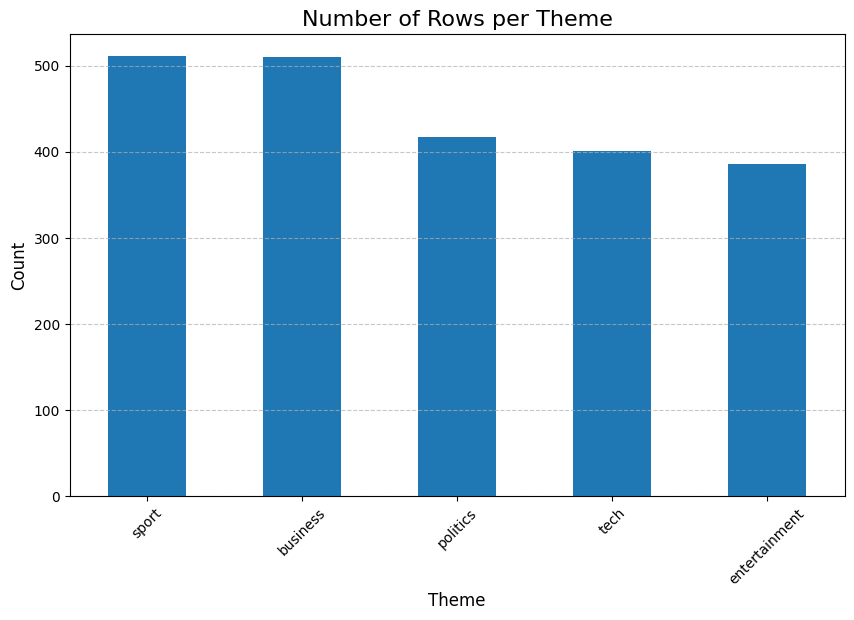

In [ ]:
# Count the number of rows per theme
theme_counts = df['theme'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
theme_counts.plot(kind='bar')

# Add title and labels
plt.title('Number of Rows per Theme', fontsize=16)
plt.xlabel('Theme', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
#Applying the Word Count Function
data=df

# Function for word count
def word_count(txt):
    if isinstance(txt, str):  # Ensure the value is a string
        return len(txt.split())
    else:
        return 0  # Return 0 for non-string values (e.g., NaN)

# Apply the word count function to both columns
data['news_Count'] = data['news'].apply(word_count)
data['summary_Count'] = data['summary'].apply(word_count)

# Display the first few rows to verify
print(data[['news', 'news_Count', 'summary', 'summary_Count']].head())

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("news","summaries"))

fig.add_trace(
    go.Histogram(x=data['news_Count'],histfunc='sum',opacity =0.8,showlegend=False,text='En'), row=1,col=1)

fig.add_trace(
    go.Histogram(x=data['summary_Count'],histfunc='sum', opacity =0.8,showlegend=False,text='Fr'), row=1,col=2)

fig.update_layout(height=600, width=800, title_text="Words Distribution")
fig.show()

In [ ]:
# Calculate the number of words in each
data["Words in News"] = (
    data["news"].astype(str).str.split().apply(len)
)
data["Words in Summary"] = (
    data["summary"].astype(str).str.split().apply(len)
)

fig = px.histogram(
    data,
    x=["Words in News", "Words in Summary"],
    color_discrete_sequence=["#3f384a", "#e04c5f"],  # Colors for English and French
    labels={"variable": "Language", "value": "Words in Sentence"},
    marginal="box",  # Add box plots on the histogram
    barmode="group",  # Grouped bar mode
    height=540,
    width=840,
    title="Word Distribution - News vs Summary",
)

# Update layout for styling and aesthetics
fig.update_layout(
    font_color="black",  # Replace FONT_COLOR with a string like "black"
    title_font_size=18,
    plot_bgcolor="white",  # Replace BACKGROUND_COLOR with a string like "white"
    paper_bgcolor="white",
    bargap=0.2,  # Adjust gap between bars
    bargroupgap=0.1,  # Adjust gap between groups
    legend=dict(
        orientation="h",
        yanchor="bottom",
        xanchor="right",
        y=1.02,
        x=1,
    ),
    yaxis_title="Count",
    xaxis_title="Words in Sentence",
)

# Display the plot
fig.show()

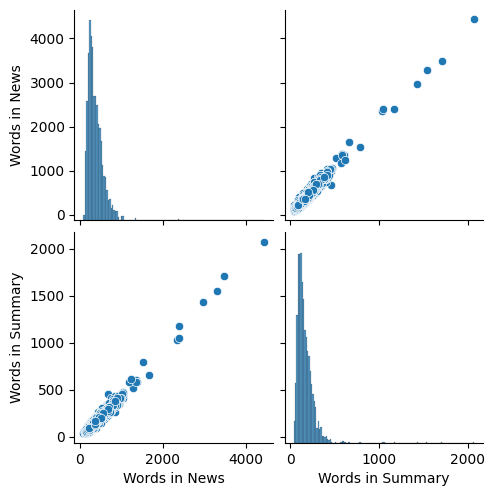

In [ ]:
sns.pairplot(data[['Words in News', 'Words in Summary']])

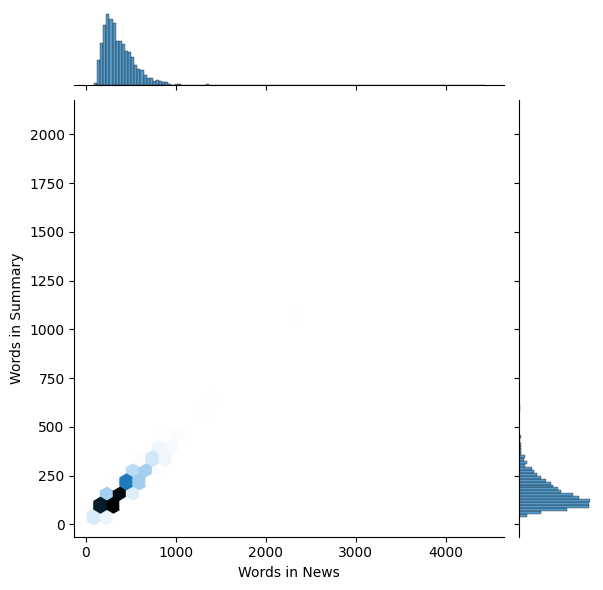

In [ ]:
# Hexbin plot to visualize density
sns.jointplot(x='Words in News',
              y='Words in Summary',
              data=data,
              kind='hex',
              gridsize=30)  # Adjust gridsize for granularity

plt.show()

In [ ]:
# Function to calculate total unique words and total words with repetition per column
def word_counts_summary(df):
    summary = {}
    for column in df.columns:
        # Get all words in the column
        all_words = [word for phrase in df[column].dropna() for word in phrase.split()]
        # Count unique words
        unique_words_count = len(set(all_words))
        # Count total words with repetition
        total_words_count = len(all_words)
        # Add to summary
        summary[column] = {
            'Total Unique Words': unique_words_count,
            'Total Words (with repetition)': total_words_count
        }
    return summary

# Calculate the word counts summary
word_counts = word_counts_summary(df[['news','summary']])

# Display the result
word_counts


{'news': {'Total Unique Words': 65553,
  'Total Words (with repetition)': 854490},
 'summary': {'Total Unique Words': 46309,
  'Total Words (with repetition)': 367496}}

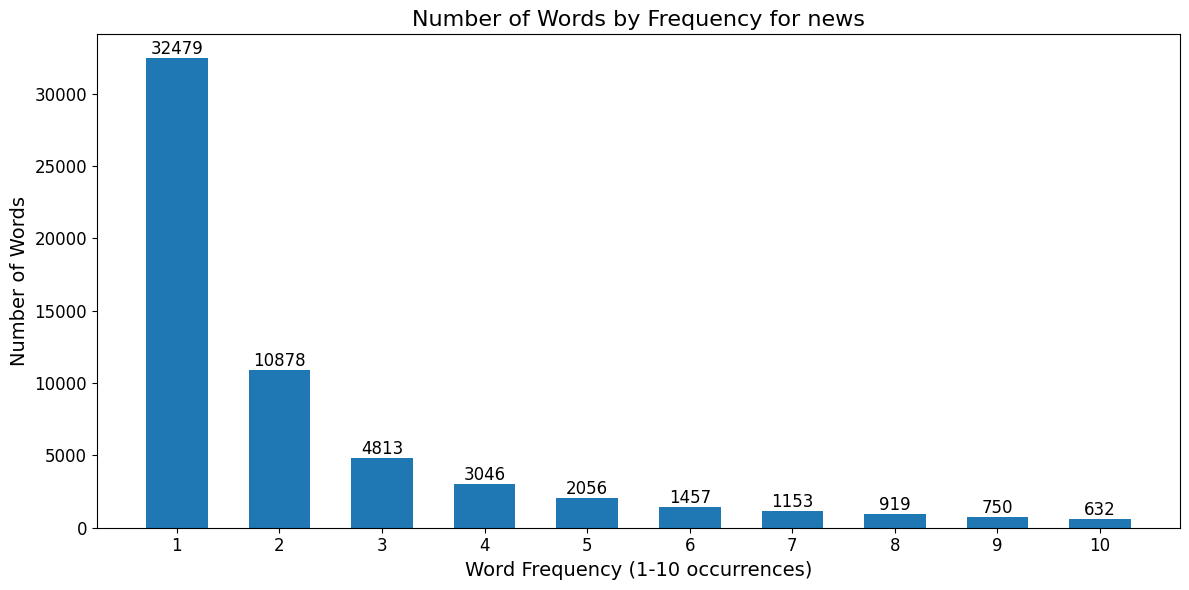

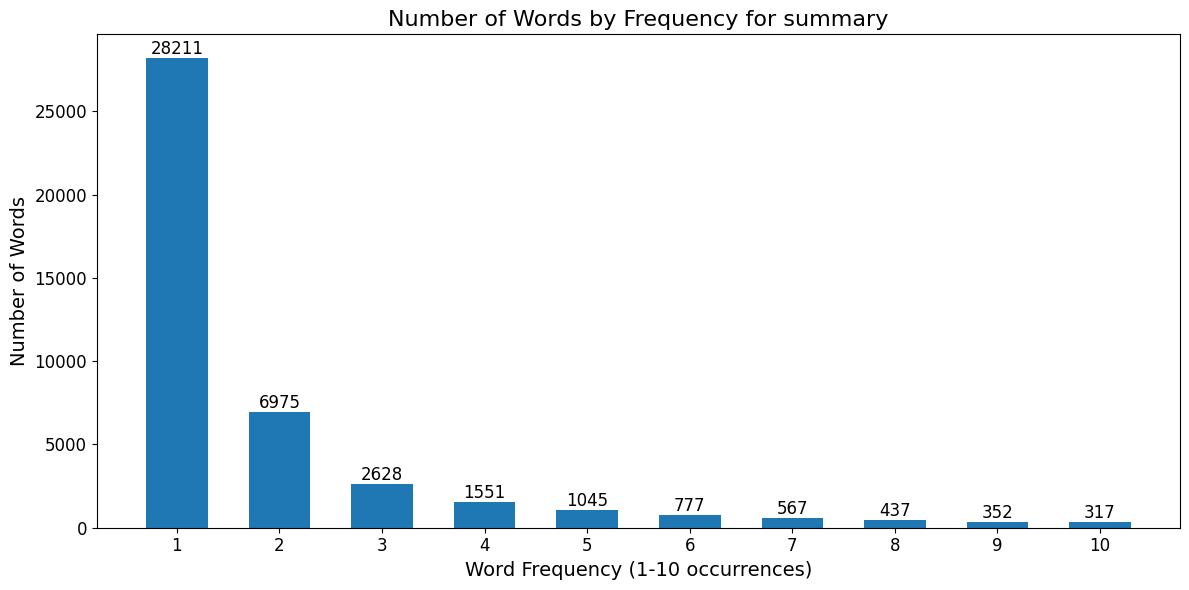

In [ ]:
# Function to plot histogram of word frequencies with larger fonts and numbers on top of columns
def plot_histogram_word_counts_with_labels(df):
    for column in df.columns:
        # Count word frequencies
        all_words = [word for phrase in df[column].dropna() for word in phrase.split()]
        word_counts = Counter(all_words)

        # Count the number of words for each frequency (1 to 10)
        frequency_counts = [list(word_counts.values()).count(i) for i in range(1, 11)]

        # Plot histogram
        plt.figure(figsize=(12, 6))
        bars = plt.bar(range(1, 11), frequency_counts, width=0.6)
        plt.title(f"Number of Words by Frequency for {column}", fontsize=16)
        plt.xlabel("Word Frequency (1-10 occurrences)", fontsize=14)
        plt.ylabel("Number of Words", fontsize=14)
        plt.xticks(range(1, 11), fontsize=12)
        plt.yticks(fontsize=12)

        # Add numbers on top of each bar
        for bar in bars:
            height = bar.get_height()
            if height > 0:  # Only add text if the bar height is greater than 0
                plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
                         ha='center', va='bottom', fontsize=12)

        plt.tight_layout()
        plt.show()

# Plot the histograms
plot_histogram_word_counts_with_labels(df[['news','summary']])


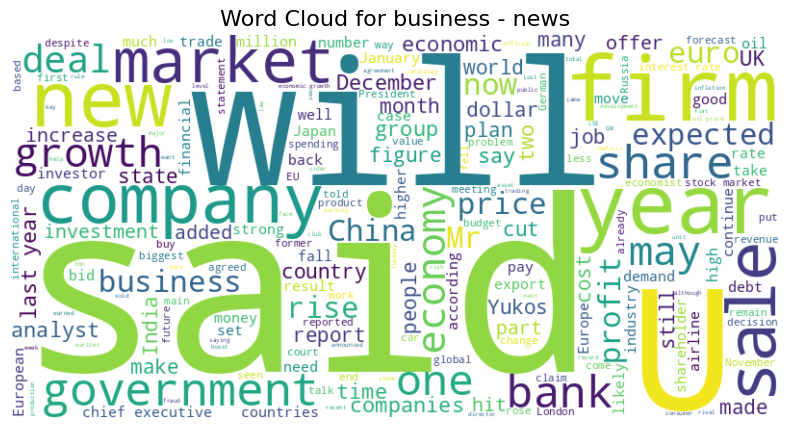

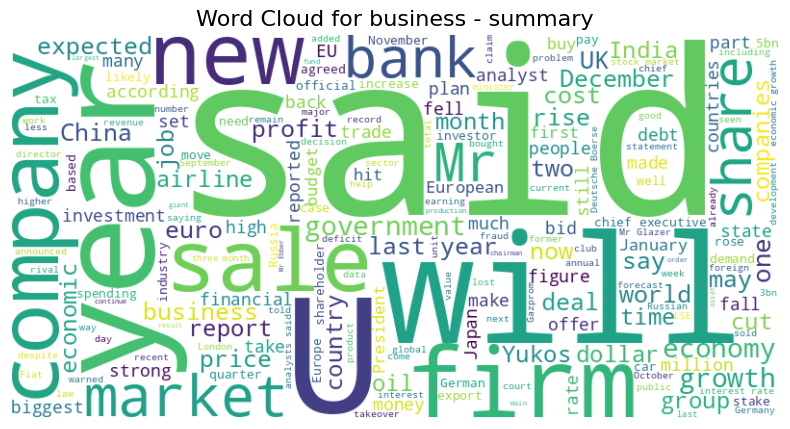

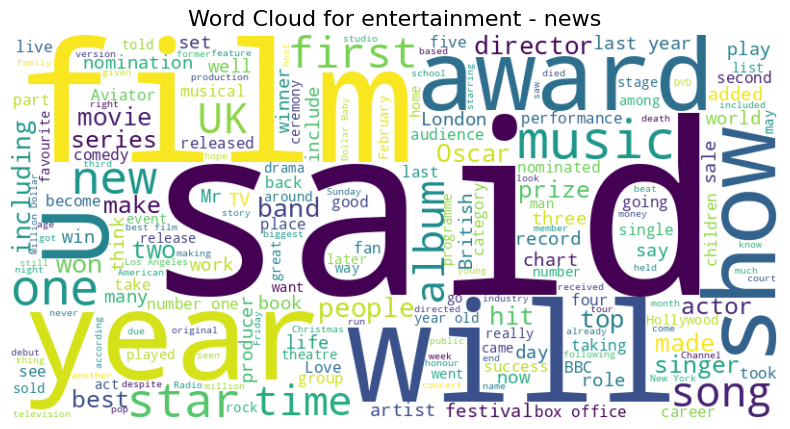

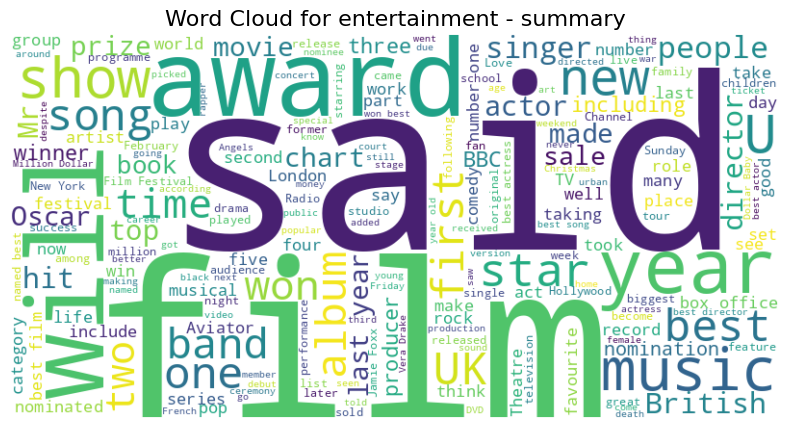

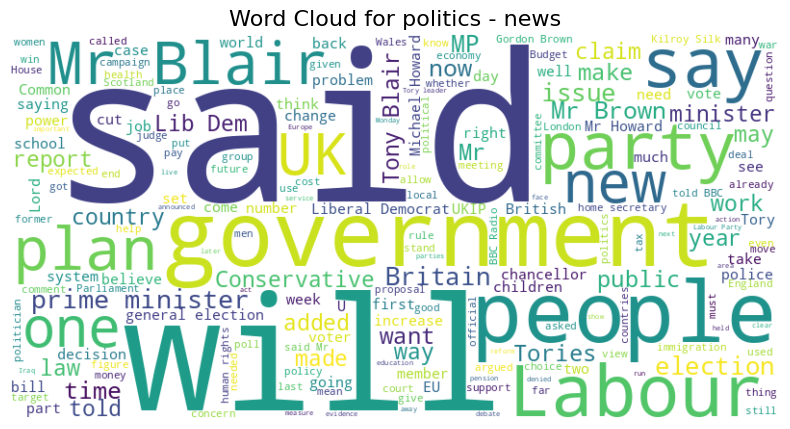

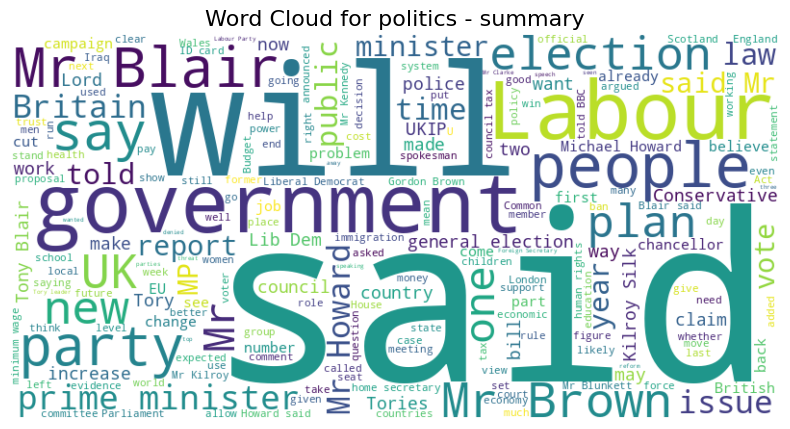

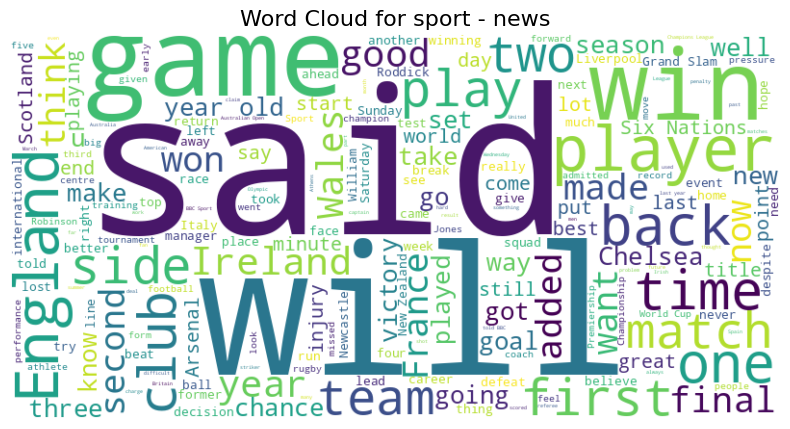

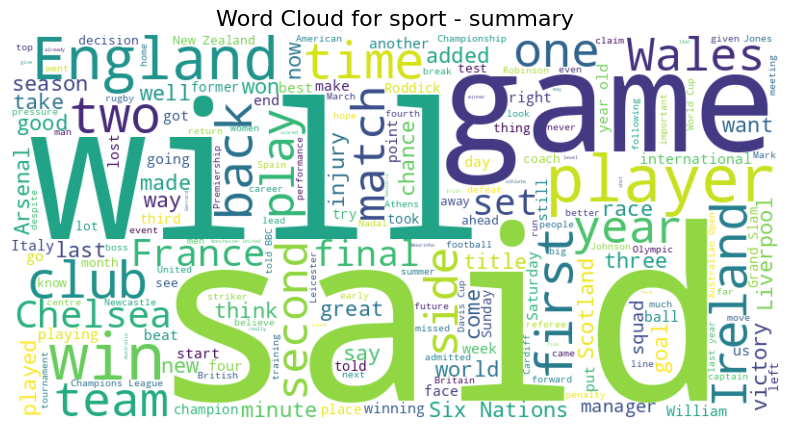

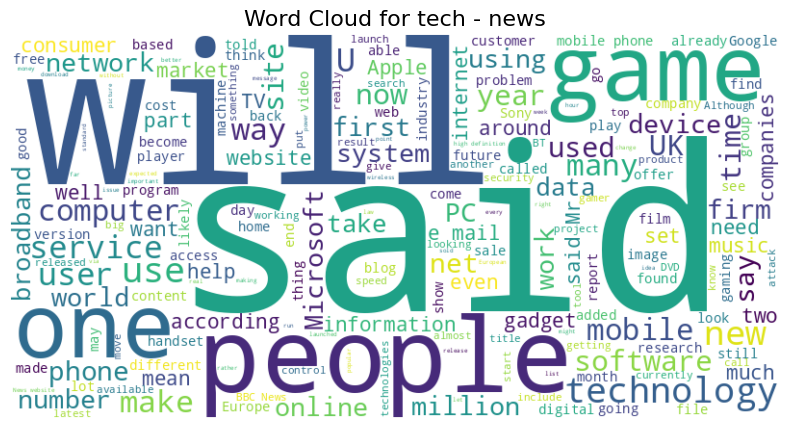

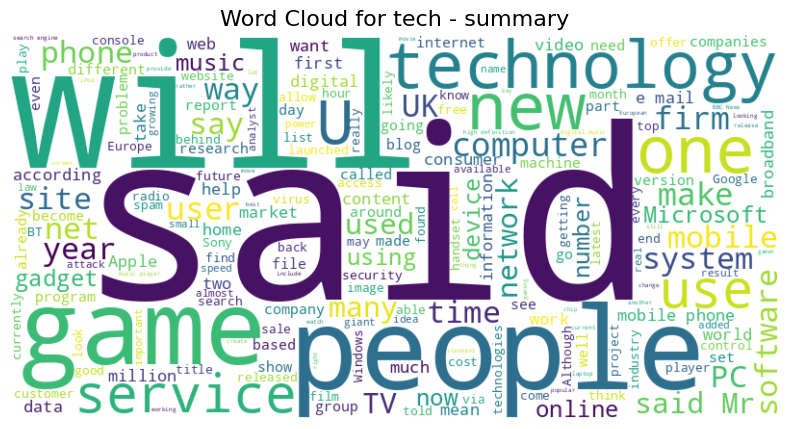

In [ ]:
# Function to create and plot a word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Iterate over each theme and column
for theme in df['theme'].unique():
    for column in ['news', 'summary']:
        # Combine all text for the current theme and column
        theme_text = ' '.join(df[df['theme'] == theme][column])

        # Plot the word cloud
        plot_wordcloud(theme_text, f"Word Cloud for {theme} - {column}")


# Model

### Metrics info:

ROUGE Scores
ROUGE measures the overlap between the predicted and reference summaries in terms of n-grams, longest common subsequence, and sentence-level similarity.

ROUGE-1: Measures unigram overlap (basic word overlap).
ROUGE-2: Measures bigram overlap (two-word sequences).
ROUGE-L: Measures the longest common subsequence overlap (captures fluency and coherence).
Interpretation of ROUGE Scores:
High ROUGE Scores:

ROUGE-1: ≥0.5 (50% unigram overlap is considered good).
ROUGE-2: ≥0.2–0.3 (bigram overlap is harder to achieve).
ROUGE-L: ≥0.2–0.4 (good alignment of subsequences).
Low ROUGE Scores:

ROUGE-1: ≤0.2 (poor word-level match).
ROUGE-2: ≤0.1 (low phrase-level similarity).
ROUGE-L: ≤0.1 (poor structural alignment).

**Note:** ROUGE tends to favor extractive summarization since it measures n-gram overlap. Abstractive summarization often has lower ROUGE scores but can still produce better-quality summaries.
For datasets like CNN/DailyMail or XSum:
ROUGE-1 ≈ 0.35–0.45 is typical for neural models.
ROUGE-2 ≈ 0.15–0.25 is common.




#### Gunning Fog Index
- **What it means**: Estimates the education level required to understand a text. It considers sentence length and the percentage of complex words (those with three or more syllables).
- **How to interpret it**:
  - **6-8**: Easy to understand for general audiences.
  - **10-12**: Suitable for college-level readers.
  - **Above 12**: Complex and difficult for most readers.

#### Spache Readability
- **What it means**: Measures how easy a text is for children or early learners to understand. It evaluates unfamiliar words compared to a predefined list of common words.
- **How to interpret it**:
  - **Below 4**: Easy for young readers.
  - **5-7**: Moderate difficulty.
  - **Above 7**: Challenging for children or early learners.
- **Best use**: Ideal for texts aimed at grades 1-4. Not suitable for adult-level or lengthy content.

#### Automated Readability Index (ARI)
- **What it means**: Estimates the grade level needed to understand the text, based on sentence length and the number of characters per word.
- **How to interpret it**:
  - **1-5**: Suitable for early education (grades 1-5).
  - **6-10**: Appropriate for middle and high school (grades 6-10).
  - **Above 12**: Challenging for average readers (college-level or beyond).

---

### Interpreting Average Readability Metrics
- **Good averages**:
  - Gunning Fog Index: 6–10 (accessible for general readers).
  - Spache Readability: Below 5 (clear for younger readers).
  - ARI: 6–9 (suitable for middle/high school audiences).
- **Bad averages**:
  - Gunning Fog Index: Above 12 (too complex for the public).
  - Spache Readability: Above 7 (too difficult for children).
  - ARI: Above 12 (college-level complexity).


## TextRank

TextRank is an unsupervised extractive summarization model based on the PageRank algorithm. It identifies the most important sentences in a text by analyzing their relationships and ranking them.

- **How it Works**:
  1. Sentences are represented as nodes in a graph.
  2. Edges between sentences are determined based on their similarity (e.g., overlapping words).
  3. Sentences are ranked using an iterative scoring algorithm similar to PageRank.

- **Key Features**:
  - Unsupervised: Does not require labeled data.
  - Domain-independent: Works for various types of text without task-specific training.
  - Extractive: Selects sentences directly from the original text.

- **Strengths**:
  - Simple and fast to implement.
  - Produces concise summaries that retain key points.

- **Limitations**:
  - Cannot generate new sentences (not abstractive).
  - Performance depends on sentence similarity metrics.

TextRank is ideal for quick and lightweight extractive summarization tasks.

In [ ]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def preprocess_text(text):
    """Preprocess a single text."""
    # Clean text
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\[.*?\]', '', text)  # Remove brackets
    text = re.sub(r'\S*@\S*\s?', '', text)  # Remove emails
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)  # Keep important characters

    # Sentence segmentation
    sentences = sent_tokenize(text)

    # Tokenization and lemmatization
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    processed_sentences = []

    for sentence in sentences:
        tokens = word_tokenize(sentence)
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
        processed_sentences.append(' '.join(tokens))

    # Join sentences back into a single string
    return ' '.join(processed_sentences)

# Preprocess the news and summary columns
processed_df = df[['news', 'summary']].copy()
processed_df['news'] = processed_df['news'].apply(preprocess_text)
processed_df['summary'] = processed_df['summary'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Split the data into training and test sets
train_df, test_df = train_test_split(processed_df, test_size=0.2, random_state=42)


In [ ]:
pd.set_option('display.max_colwidth', None)

train_df.head()

news  \
1490                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        bellamy new fire newcastle bos graeme souness reopened dispute craig bellamy claiming welshman good enough magpie . bellamy left newcastle join celtic loan major row souness . souness refused refer 25yearold name said bellamy score enough goal chap thats gone scored 9.3 goal season time senior football half werent even top flight , said souness . thats good enough striker club like . need two striker near 20 goal regular basis . bellamy turned move birmingham favour joining celtic disagreement welsh international playing position quickly escalated . earlier week , souness said risked losing confidence player damaging reputation taken hard line bellamy accused lying . certain thing forgive forget , said souness . id seen weak case future player dressing room job newcastle . could return st james park say want . however , would seem unlikely play newcastle long souness remains charge .   
2001                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  china overtake u net use chinese netusing population look set exceed u less three year , say report . china net user number 100m represents less 8 country 1.3 billion people . market analyst panlogic predicts net user china exceed 137 million u user net 2008. report say country culture mean chinese people use net different end many nation . already net use china different character many western nation , said william makower , chief executive panl

In [ ]:
# Count the number of sentences in each column
processed_df["Sentences in news"] = processed_df["news"].astype(str).apply(lambda x: len(sent_tokenize(x)))
processed_df["Sentences in original"] = processed_df["summary"].astype(str).apply(lambda x: len(sent_tokenize(x)))

# Prepare data for visualization
sentence_counts = processed_df.melt(
    value_vars=["Sentences in news", "Sentences in original"],
    var_name="Category",
    value_name="Sentence Count"
)

# Group by sentence count for each category
sentence_distribution = sentence_counts.groupby(["Category", "Sentence Count"]).size().reset_index(name="Count")


In [ ]:
def textrank_summary(text, num_sentences=3):
    """Generate extractive summary using TextRank."""
    # Sentence tokenization
    sentences = sent_tokenize(text)

    if len(sentences) < 2:
        return text  # Return the original text for very short inputs

    # Adjust num_sentences dynamically
    num_sentences = min(num_sentences, len(sentences) // 2 or 1)

    # TF-IDF vectorization
    vectorizer = TfidfVectorizer()
    sentence_vectors = vectorizer.fit_transform(sentences)

    # Compute cosine similarity matrix
    similarity_matrix = (sentence_vectors * sentence_vectors.T).toarray()

    # Build graph and compute PageRank scores
    graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank(graph)

    # Rank sentences and extract the top sentences
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    summary = ' '.join([ranked_sentences[i][1] for i in range(min(num_sentences, len(ranked_sentences)))])
    return summary




# Generate TextRank summaries for the test set
test_df['predicted_summary'] = test_df['news'].apply(lambda x: textrank_summary(x, num_sentences=3))



In [ ]:
# Initialize ROUGE scorer
rouge_scorer_tool = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

# Store scores
rouge_scores = []
meteor_scores = []

# Iterate over all rows in the test dataframe
for idx in range(len(test_df)):
    predicted = test_df.iloc[idx]['predicted_summary']
    original = test_df.iloc[idx]['summary']

    # Compute ROUGE
    rouge_result = rouge_scorer_tool.score(original, predicted)
    rouge_scores.append(rouge_result)

    # Compute METEOR (Tokenize input strings)
    tokenized_predicted = word_tokenize(predicted)
    tokenized_original = word_tokenize(original)
    meteor_result = meteor_score([tokenized_original], tokenized_predicted)
    meteor_scores.append(meteor_result)

# Calculate average ROUGE scores
average_rouge = {key: np.mean([score[key].fmeasure for score in rouge_scores]) for key in rouge_scores[0].keys()}
average_meteor = np.mean(meteor_scores)

# Print results
print("\nAverage ROUGE Scores:")
for metric, value in average_rouge.items():
    print(f"{metric}: {value:.4f}")
print(f"Average METEOR Score: {average_meteor:.4f}")

# Display 5 random comparisons
sample_indices = random.sample(range(len(test_df)), 5)
for idx in sample_indices:
    print(f"\nNews: {test_df.iloc[idx]['news']}")
    print(f"Predicted Summary: {test_df.iloc[idx]['predicted_summary']}")
    print(f"Original Summary: {test_df.iloc[idx]['summary']}")



Average ROUGE Scores:
rouge1: 0.5861
rouge2: 0.5283
rougeL: 0.4684
Average METEOR Score: 0.4322

News: serena becomes world number two serena williams moved five place second world ranking australian open win . williams first grand slam title since 2003 victory lindsay davenport , world number one . men champion marat safin remains fourth atp ranking beaten finalist lleyton hewitt replaces andy roddick world number two . roger federer retains top spot , safin overtaken hewitt become new leader champion race . alicia molik , lost threeset thriller davenport quarterfinal , womens top 10 first time career . rise mean australia player top 10 men womens ranking first time 21 year . britain elena baltacha , qualified reached third round , risen 120 world leap 65 place highest ranking yet .
Predicted Summary: men champion marat safin remains fourth atp ranking beaten finalist lleyton hewitt replaces andy roddick world number two . rise mean australia player top 10 men womens ranking first ti

In [ ]:
# Compute readability metrics for the predicted summaries
def calculate_readability_metrics(text):
    """Calculate readability metrics for a given text."""
    try:
        spache_readability = textstat.spache_readability(text)
    except Exception:
        spache_readability = None  # Set to None if Spache is not applicable

    return {
        "Gunning Fog Index": textstat.gunning_fog(text),
        "Spache Readability": spache_readability,
        "Automated Readability Index": textstat.automated_readability_index(text),
    }

# Apply readability metrics to the predicted summaries in the test set
test_df['readability_metrics'] = test_df['predicted_summary'].apply(calculate_readability_metrics)

# Display a sample of results
print(test_df[['predicted_summary', 'readability_metrics']].head())

# Average readability metrics for the test set
readability_averages = {
    "Average Gunning Fog Index": test_df['readability_metrics'].apply(lambda x: x['Gunning Fog Index']).mean(),
    "Average Spache Readability": test_df['readability_metrics'].apply(lambda x: x['Spache Readability']).dropna().mean(),
    "Average Automated Readability Index": test_df['readability_metrics'].apply(lambda x: x['Automated Readability Index']).mean(),
}

print("\nAverage Readability Metrics for the Test Set:")
for metric, value in readability_averages.items():
    print(f"{metric}: {value:.2f}")


                                                                                                                                                                                                                                                                                                                                                               predicted_summary  \
414   july , diageo , listed london stock exchange , reported annual turnover 8.89bn , 9.28bn year earlier . diageo buy u wine firm diageo , world biggest spirit company , agreed buy californian wine company chalone 260m 134m allcash deal . diageo said expects get u regulatory approval deal first quarter 2005. said chalone would integrated existing u wine business .   
420                                                                                                                                                 astrazeneca hit drug failure share angloswedish drug closed 8 uk trade failure iressa drug major clinical tr

In [ ]:
# Compute BERTScore
P, R, F1 = score(
    test_df['predicted_summary'].tolist(),
    test_df['summary'].tolist(),
    lang="en"  # Set language to English
)

# Average BERTScore
average_bertscore = F1.mean().item()
print(f"Average BERTScore (F1): {average_bertscore:.4f}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Average BERTScore (F1): 0.9011


In [ ]:
test_df['flesch_kincaid_grade'] = test_df['predicted_summary'].apply(textstat.flesch_kincaid_grade)
average_fk_grade = test_df['flesch_kincaid_grade'].mean()
print(f"Average Flesch-Kincaid Grade Level: {average_fk_grade:.2f}")


Average Flesch-Kincaid Grade Level: 9.93


In [ ]:
# Calculate the number of words in each column
test_df["Words in news"] = test_df["news"].astype(str).str.split().apply(len)
test_df["Words in original"] = test_df["summary"].astype(str).str.split().apply(len)
test_df["Words in prediction"] = test_df["predicted_summary"].astype(str).str.split().apply(len)

# Create a long-format dataframe for visualization
word_counts = test_df.melt(
    value_vars=["Words in news", "Words in original", "Words in prediction"],
    var_name="Category",
    value_name="Word Count"
)

# Plot histogram with Plotly
fig = px.histogram(
    word_counts,
    x="Word Count",
    color="Category",
    color_discrete_sequence=["#1f77b4", "#ff7f0e", "#2ca02c"],  # Distinct colors
    labels={"Category": "Text Type", "Word Count": "Number of Words"},
    marginal="box",  # Add box plots to the histogram
    barmode="group",  # Group bars by category
    height=540,
    width=840,
    title="Word Distribution - News, Original Summary, and Predicted Summary",
)

# Update layout for better aesthetics
fig.update_layout(
    font_color="black",
    title_font_size=18,
    plot_bgcolor="white",
    paper_bgcolor="white",
    bargap=0.2,
    bargroupgap=0.1,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        xanchor="right",
        y=1.02,
        x=1,
    ),
    yaxis_title="Count",
    xaxis_title="Number of Words",
)

# Display the plot
fig.show()


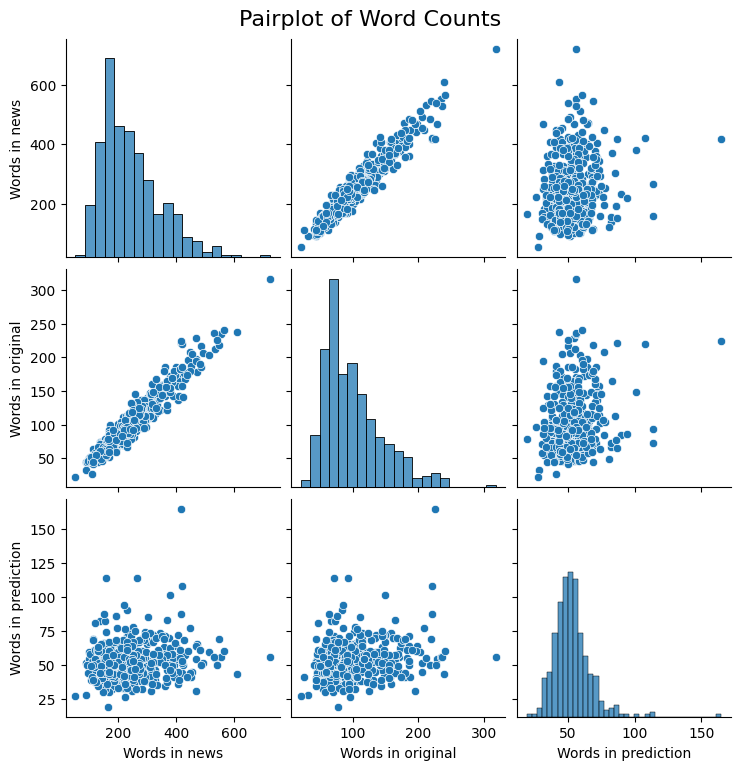

In [ ]:
# Pair plot with Seaborn
sns.pairplot(test_df[["Words in news", "Words in original", "Words in prediction"]])
plt.suptitle("Pairplot of Word Counts", y=1.02, fontsize=16)
plt.show()

## LexRank


### Differences Between LexRank and TextRank

| Aspect              | LexRank                                      | TextRank                                    |
|---------------------|----------------------------------------------|--------------------------------------------|
| **Similarity Measure** | Uses **cosine similarity** between TF-IDF vectors of sentences. | Typically uses **word overlap** or similar measures for sentence similarity. |
| **Graph Construction** | Includes a **threshold** to filter edges based on similarity scores, making the graph more selective. | Connects all sentences in a fully connected graph, leading to a denser graph. |
| **Ranking Algorithm**  | Based on **eigenvector centrality**, similar to PageRank, but with selective edge inclusion. | Directly applies the **PageRank algorithm** on the fully connected graph. |
| **Use Case**         | More robust for multi-document summarization due to thresholding. | Works well for single-document summarization but may struggle with multi-document contexts. |
| **Computational Cost** | Slightly higher due to the TF-IDF vector calculation and thresholding. | Lower due to the simpler similarity calculation and fully connected graph. |

### Key Difference
- **LexRank** focuses on selective sentence connections (via thresholding), making it more precise for larger or multi-document datasets.
- **TextRank** connects all sentences, making it faster but less selective, which can lead to noisier outputs in complex scenarios.

In summary, LexRank is more refined and robust, while TextRank is simpler and faster.


In [ ]:
def preprocess_text(text):
    """Preprocess a single text."""
    # Clean text
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\[.*?\]', '', text)  # Remove brackets
    text = re.sub(r'\S*@\S*\s?', '', text)  # Remove emails
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)  # Keep important characters
    return text

# Preprocess the news and summary columns
processed_df = df[['news', 'summary']].copy()
processed_df['news'] = processed_df['news'].apply(preprocess_text)
processed_df['summary'] = processed_df['summary'].apply(preprocess_text)

# Split the data into training and test sets
train_df, test_df = train_test_split(processed_df, test_size=0.2, random_state=42)


                 Category  Sentence Count  Count
0       Sentences in news               4      1
1       Sentences in news               5      1
2       Sentences in news               6      7
3       Sentences in news               7      9
4       Sentences in news               8     10
5       Sentences in news               9     24
6       Sentences in news              10     35
7       Sentences in news              11     30
8       Sentences in news              12     35
9       Sentences in news              13     29
10      Sentences in news              14     30
11      Sentences in news              15     26
12      Sentences in news              16     18
13      Sentences in news              17     20
14      Sentences in news              18     28
15      Sentences in news              19     15
16      Sentences in news              20     21
17      Sentences in news              21     12
18      Sentences in news              22     12
19      Sentences in

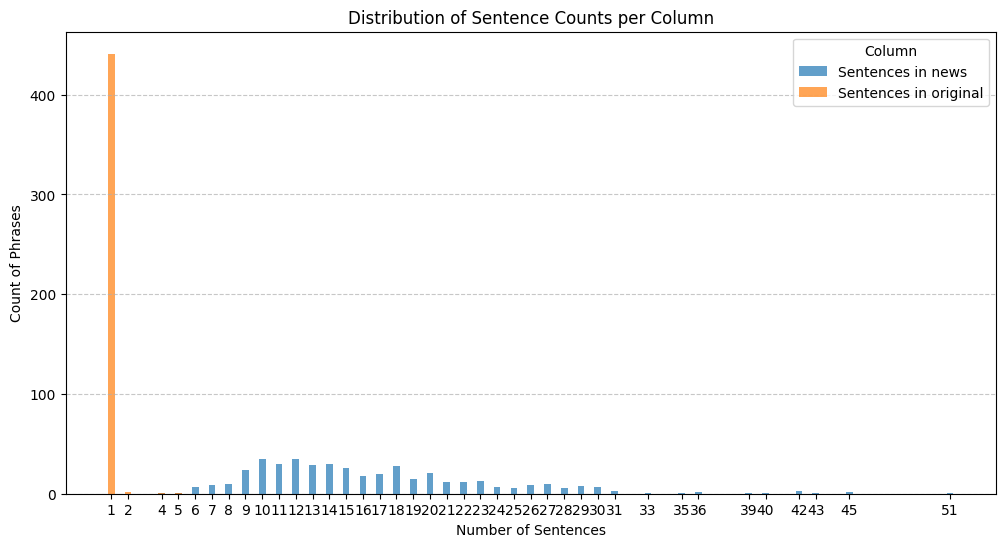

In [ ]:
# Count the number of sentences in each column
test_df["Sentences in news"] = test_df["news"].astype(str).apply(lambda x: len(sent_tokenize(x)))
test_df["Sentences in original"] = test_df["summary"].astype(str).apply(lambda x: len(sent_tokenize(x)))

# Prepare data for visualization
sentence_counts = test_df.melt(
    value_vars=["Sentences in news", "Sentences in original"],
    var_name="Category",
    value_name="Sentence Count"
)

# Group by sentence count for each category
sentence_distribution = sentence_counts.groupby(["Category", "Sentence Count"]).size().reset_index(name="Count")

# Print the sentence distribution for debugging
print(sentence_distribution)

# Create the column chart
plt.figure(figsize=(12, 6))

# Ensure x-axis values are distinct and sorted
x_ticks = sorted(sentence_distribution["Sentence Count"].unique())

# Plot separate bars for each category
for category in sentence_distribution["Category"].unique():
    subset = sentence_distribution[sentence_distribution["Category"] == category]
    plt.bar(
        subset["Sentence Count"],
        subset["Count"],
        label=category,
        alpha=0.7,
        width=0.4  # Adjust bar width to reduce overlap
    )

# Add labels and title
plt.xticks(x_ticks)  # Ensure proper x-axis ticks
plt.xlabel("Number of Sentences")
plt.ylabel("Count of Phrases")
plt.title("Distribution of Sentence Counts per Column")
plt.legend(title="Column")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the chart
plt.show()


In [ ]:
print(test_df['news'].iloc[0])  # View a sample text
print(sent_tokenize(test_df['news'].iloc[0]))  # View the tokenized sentences


diageo to buy us wine firm diageo, the worlds biggest spirits company, has agreed to buy californian wine company chalone for 260m 134m in an allcash deal. although diageos bestknown brands include smirnoff vodka and guinness stout, it already has a us winemaking arm  diageo chateau  estate wines. diageo said it expects to get us regulatory approval for the deal during the first quarter of 2005. it said chalone would be integrated into its existing us wine business. the us wine market represents a growth opportunity for diageo, with favourable demographic and consumption trends, said diageo north america president ivan menezes. in july, diageo, which is listed on the london stock exchange, reported an annual turnover of 8.89bn, down from 9.28bn a year earlier. it blamed a weaker dollar for its lower turnover. in the year ending 31 december 2003, chalone reported revenues of 69.4m. 
['diageo to buy us wine firm diageo, the worlds biggest spirits company, has agreed to buy californian wi

In [ ]:
def lexrank_summary(text, num_sentences=3):
    """Generate extractive summary using LexRank."""
    sentences = sent_tokenize(text)
    sentences = [s.strip() for s in sentences if s.strip()]  # Remove empty sentences

    # Handle cases with insufficient sentences
    if len(sentences) <= num_sentences or len(sentences) < 2:
        return ' '.join(sentences[:num_sentences])  # Return first few sentences

    try:
        # Initialize LexRank
        lxr = LexRank(sentences, stopwords=STOPWORDS['en'])

        # Generate summary
        summary = lxr.get_summary(sentences, summary_size=num_sentences, threshold=None)
        return ' '.join(summary)

    except ValueError:  # Handle uninformative input
        return ' '.join(sentences[:num_sentences])  # Return first few sentences


# Generate LexRank summaries
test_df['predicted_summary'] = test_df['news'].apply(lambda x: lexrank_summary(x, num_sentences=3))


In [ ]:
# Evaluate ROUGE and METEOR
rouge_scorer_tool = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
rouge_scores = []
meteor_scores = []

for idx in range(len(test_df)):
    predicted = test_df.iloc[idx]['predicted_summary']
    original = test_df.iloc[idx]['summary']

    # Compute ROUGE
    rouge_result = rouge_scorer_tool.score(original, predicted)
    rouge_scores.append(rouge_result)

    # Compute METEOR
    tokenized_predicted = word_tokenize(predicted)
    tokenized_original = word_tokenize(original)
    meteor_result = meteor_score([tokenized_original], tokenized_predicted)
    meteor_scores.append(meteor_result)

# Calculate average ROUGE scores
average_rouge = {key: np.mean([score[key].fmeasure for score in rouge_scores]) for key in rouge_scores[0].keys()}
average_meteor = np.mean(meteor_scores)

print("\nAverage ROUGE Scores:")
for metric, value in average_rouge.items():
    print(f"{metric}: {value:.4f}")
print(f"Average METEOR Score: {average_meteor:.4f}")


Average ROUGE Scores:
rouge1: 0.4667
rouge2: 0.3629
rougeL: 0.3551
Average METEOR Score: 0.3160


In [ ]:
def calculate_readability_metrics(text):
    try:
        spache_readability = textstat.spache_readability(text)
    except Exception:
        spache_readability = None
    return {
        "Gunning Fog Index": textstat.gunning_fog(text),
        "Spache Readability": spache_readability,
        "Automated Readability Index": textstat.automated_readability_index(text),
    }

test_df['readability_metrics'] = test_df['predicted_summary'].apply(calculate_readability_metrics)

readability_averages = {
    "Average Gunning Fog Index": test_df['readability_metrics'].apply(lambda x: x['Gunning Fog Index']).mean(),
    "Average Spache Readability": test_df['readability_metrics'].apply(lambda x: x['Spache Readability']).dropna().mean(),
    "Average Automated Readability Index": test_df['readability_metrics'].apply(lambda x: x['Automated Readability Index']).mean(),
}

print("\nAverage Readability Metrics:")
for metric, value in readability_averages.items():
    print(f"{metric}: {value:.2f}")


Average Readability Metrics:
Average Gunning Fog Index: 11.74
Average Spache Readability: 5.72
Average Automated Readability Index: 12.20


In [ ]:
# Calculate the number of words in each column
test_df["Words in news"] = test_df["news"].astype(str).str.split().apply(len)
test_df["Words in original"] = test_df["summary"].astype(str).str.split().apply(len)
test_df["Words in prediction"] = test_df["predicted_summary"].astype(str).str.split().apply(len)

# Create a long-format dataframe for visualization
word_counts = test_df.melt(
    value_vars=["Words in news", "Words in original", "Words in prediction"],
    var_name="Category",
    value_name="Word Count"
)

# Plot histogram with Plotly
fig = px.histogram(
    word_counts,
    x="Word Count",
    color="Category",
    color_discrete_sequence=["#1f77b4", "#ff7f0e", "#2ca02c"],  # Distinct colors
    labels={"Category": "Text Type", "Word Count": "Number of Words"},
    marginal="box",  # Add box plots to the histogram
    barmode="group",  # Group bars by category
    height=540,
    width=840,
    title="Word Distribution - News, Original Summary, and Predicted Summary",
)

# Update layout for better aesthetics
fig.update_layout(
    font_color="black",
    title_font_size=18,
    plot_bgcolor="white",
    paper_bgcolor="white",
    bargap=0.2,
    bargroupgap=0.1,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        xanchor="right",
        y=1.02,
        x=1,
    ),
    yaxis_title="Count",
    xaxis_title="Number of Words",
)

# Display the plot
fig.show()


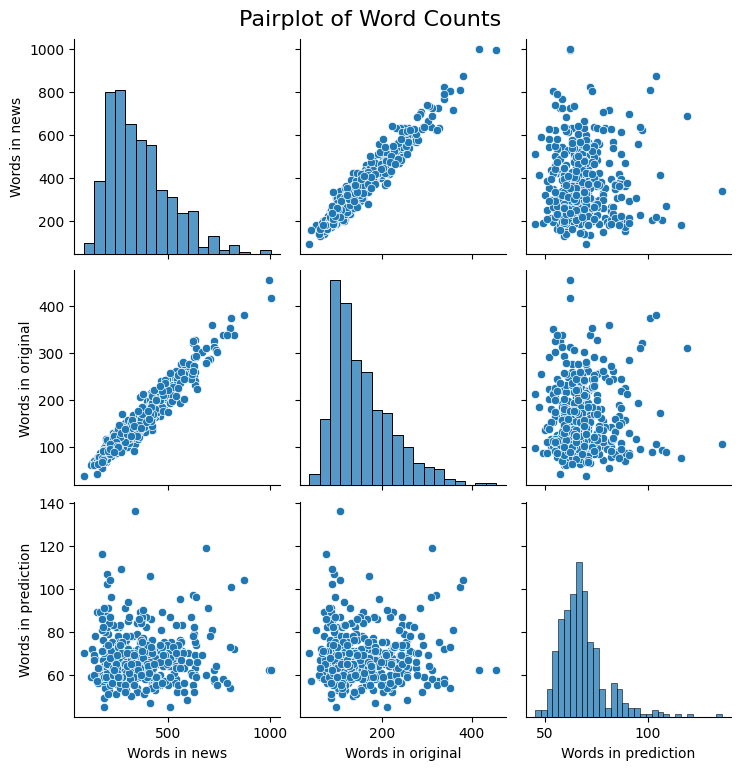

In [ ]:
# Pair plot with Seaborn
sns.pairplot(test_df[["Words in news", "Words in original", "Words in prediction"]])
plt.suptitle("Pairplot of Word Counts", y=1.02, fontsize=16)
plt.show()

## Latent Semantic Analysis (LSA)

Latent Semantic Analysis (LSA) is an unsupervised extractive summarization technique that uses singular value decomposition (SVD) to identify the most important sentences in a document by analyzing hidden semantic relationships.

- **How it Works**:
  1. Converts the document into a term-frequency matrix.
  2. Applies **singular value decomposition (SVD)** to reduce the matrix's dimensionality, uncovering latent patterns in the data.
  3. Scores and selects sentences based on their contribution to the dominant topics.

- **Key Features**:
  - Extractive: Selects sentences directly from the original text.
  - Unsupervised: Does not require labeled training data.
  - Semantic Analysis: Captures relationships between words and sentences.

- **Strengths**:
  - Effective for identifying key topics in a document.
  - Handles synonymy and polysemy by analyzing latent semantics.

- **Limitations**:
  - Assumes linear relationships, which may not capture complex semantic nuances.
  - Requires preprocessing like stop-word removal and stemming.

LSA is a simple yet effective model for extractive summarization, especially for tasks where uncovering underlying semantic patterns is important.



In [ ]:

def preprocess_text(text):
    """Preprocess a single text."""
    # Clean text
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\[.*?\]', '', text)  # Remove brackets
    text = re.sub(r'\S*@\S*\s?', '', text)  # Remove emails
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)  # Keep important characters
    return text

# Preprocess the news and summary columns
processed_df = df[['news', 'summary']].copy()
processed_df['news'] = processed_df['news'].apply(preprocess_text)
processed_df['summary'] = processed_df['summary'].apply(preprocess_text)

# Split the data into training and test sets
train_df, test_df = train_test_split(processed_df, test_size=0.2, random_state=42)


                 Category  Sentence Count  Count
0       Sentences in news               4      1
1       Sentences in news               5      1
2       Sentences in news               6      7
3       Sentences in news               7      9
4       Sentences in news               8     10
5       Sentences in news               9     24
6       Sentences in news              10     35
7       Sentences in news              11     30
8       Sentences in news              12     35
9       Sentences in news              13     29
10      Sentences in news              14     30
11      Sentences in news              15     26
12      Sentences in news              16     18
13      Sentences in news              17     20
14      Sentences in news              18     28
15      Sentences in news              19     15
16      Sentences in news              20     21
17      Sentences in news              21     12
18      Sentences in news              22     12
19      Sentences in

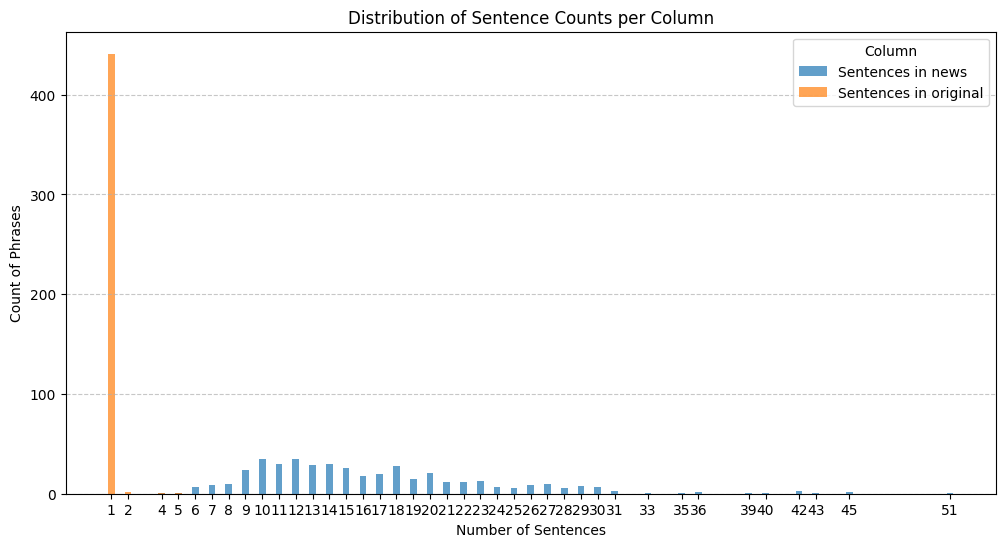

In [ ]:
# Count the number of sentences in each column
test_df["Sentences in news"] = test_df["news"].astype(str).apply(lambda x: len(sent_tokenize(x)))
test_df["Sentences in original"] = test_df["summary"].astype(str).apply(lambda x: len(sent_tokenize(x)))

# Prepare data for visualization
sentence_counts = test_df.melt(
    value_vars=["Sentences in news", "Sentences in original"],
    var_name="Category",
    value_name="Sentence Count"
)

# Group by sentence count for each category
sentence_distribution = sentence_counts.groupby(["Category", "Sentence Count"]).size().reset_index(name="Count")

# Print the sentence distribution for debugging
#print(sentence_distribution)

# Create the column chart
plt.figure(figsize=(12, 6))

# Ensure x-axis values are distinct and sorted
x_ticks = sorted(sentence_distribution["Sentence Count"].unique())

# Plot separate bars for each category
for category in sentence_distribution["Category"].unique():
    subset = sentence_distribution[sentence_distribution["Category"] == category]
    plt.bar(
        subset["Sentence Count"],
        subset["Count"],
        label=category,
        alpha=0.7,
        width=0.4  # Adjust bar width to reduce overlap
    )

# Add labels and title
plt.xticks(x_ticks)  # Ensure proper x-axis ticks
plt.xlabel("Number of Sentences")
plt.ylabel("Count of Phrases")
plt.title("Distribution of Sentence Counts per Column")
plt.legend(title="Column")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the chart
plt.show()


In [ ]:
# Generate LSA summaries for the test set
def lsa_summary(text, num_sentences=3):
    """Generate extractive summary using LSA."""
    sentences = sent_tokenize(text)  # Sentence tokenization
    if len(sentences) <= num_sentences:
        return ' '.join(sentences)  # Return full text if not enough sentences

    # Create a TF-IDF matrix for the sentences
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    sentence_matrix = vectorizer.fit_transform(sentences)

    # Perform dimensionality reduction with TruncatedSVD (LSA)
    lsa = TruncatedSVD(n_components=num_sentences, random_state=42)
    lsa_matrix = lsa.fit_transform(sentence_matrix)

    # Rank sentences by their contribution to the topics
    sentence_scores = lsa_matrix.sum(axis=1)
    ranked_sentences = [sentences[i] for i in sentence_scores.argsort()[::-1]]

    # Return the top sentences as the summary
    summary = ' '.join(ranked_sentences[:num_sentences])
    return summary

# Apply LSA summarization to the test set
test_df['predicted_summary'] = test_df['news'].apply(lambda x: lsa_summary(x, num_sentences=3))


In [ ]:
# Evaluate ROUGE and METEOR
rouge_scorer_tool = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
rouge_scores = []
meteor_scores = []

for idx in range(len(test_df)):
    predicted = test_df.iloc[idx]['predicted_summary']
    original = test_df.iloc[idx]['summary']

    # Compute ROUGE
    rouge_result = rouge_scorer_tool.score(original, predicted)
    rouge_scores.append(rouge_result)

    # Compute METEOR
    tokenized_predicted = word_tokenize(predicted)
    tokenized_original = word_tokenize(original)
    meteor_result = meteor_score([tokenized_original], tokenized_predicted)
    meteor_scores.append(meteor_result)

# Calculate average ROUGE scores
average_rouge = {key: np.mean([score[key].fmeasure for score in rouge_scores]) for key in rouge_scores[0].keys()}
average_meteor = np.mean(meteor_scores)

print("\nAverage ROUGE Scores:")
for metric, value in average_rouge.items():
    print(f"{metric}: {value:.4f}")
print(f"Average METEOR Score: {average_meteor:.4f}")


Average ROUGE Scores:
rouge1: 0.4267
rouge2: 0.3302
rougeL: 0.3160
Average METEOR Score: 0.2826


In [ ]:
# Display 5 random comparisons
sample_indices = random.sample(range(len(test_df)), 5)
for idx in sample_indices:
    print(f"\nNews: {test_df.iloc[idx]['news']}")
    print(f"Predicted Summary: {test_df.iloc[idx]['predicted_summary']}")
    print(f"Original Summary: {test_df.iloc[idx]['summary']}")


News: brit awards for devon music acts devon singer joss stone and rock band muse won coveted brit awards during the events 25th anniversary. seventeenyearold stone, from near cullumpton, won two awards best british female act, and best urban act out of three award nominations. muse, whose members met in south devon, beat franz ferdinand, jamie cullum, kasabian and the libertines for best british live act. the band has sold about two million records worldwide. after beating amy winehouse, jamelia, natasha bedingfield and pj harvey to the best british female prize, joss stone said i dont know what to say. i dont like doing this at all. id like to thank my family for being really supportive and everybody that made my record with me. i dont even know what to do right now. thank you all you guys for voting for me, i feel sick right now. viewers of digital music tv channel mtv base voted stone the winner in the best urban act category. ms stone also performed her song right to be wrong, ba

In [ ]:
# Calculate the number of words in each column
test_df["Words in news"] = test_df["news"].astype(str).str.split().apply(len)
test_df["Words in original"] = test_df["summary"].astype(str).str.split().apply(len)
test_df["Words in prediction"] = test_df["predicted_summary"].astype(str).str.split().apply(len)

# Create a long-format dataframe for visualization
word_counts = test_df.melt(
    value_vars=["Words in news", "Words in original", "Words in prediction"],
    var_name="Category",
    value_name="Word Count"
)

# Plot histogram with Plotly
fig = px.histogram(
    word_counts,
    x="Word Count",
    color="Category",
    color_discrete_sequence=["#1f77b4", "#ff7f0e", "#2ca02c"],  # Distinct colors
    labels={"Category": "Text Type", "Word Count": "Number of Words"},
    marginal="box",  # Add box plots to the histogram
    barmode="group",  # Group bars by category
    height=540,
    width=840,
    title="Word Distribution - News, Original Summary, and Predicted Summary",
)

# Update layout for better aesthetics
fig.update_layout(
    font_color="black",
    title_font_size=18,
    plot_bgcolor="white",
    paper_bgcolor="white",
    bargap=0.2,
    bargroupgap=0.1,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        xanchor="right",
        y=1.02,
        x=1,
    ),
    yaxis_title="Count",
    xaxis_title="Number of Words",
)

# Display the plot
fig.show()


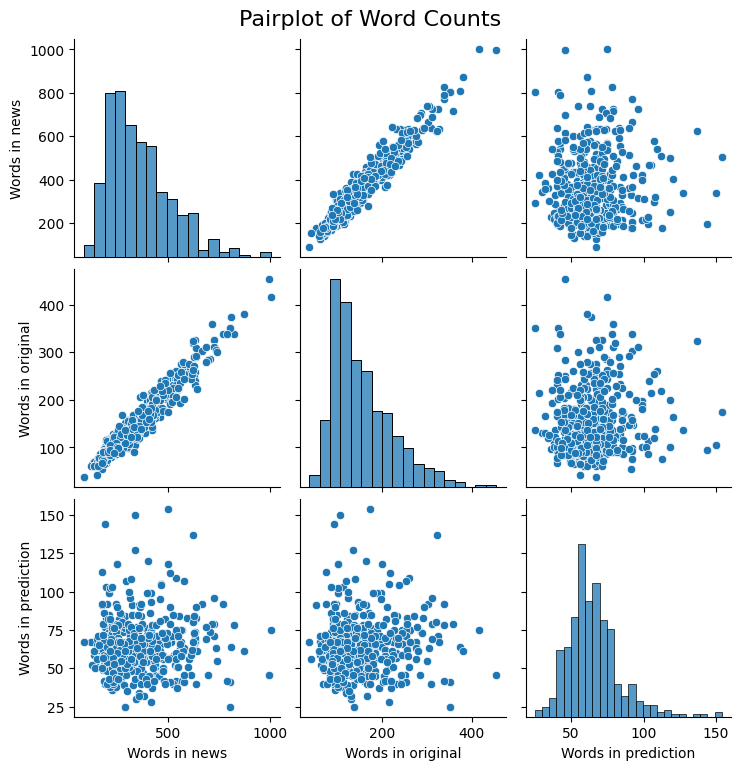

In [ ]:
# Pair plot with Seaborn
sns.pairplot(test_df[["Words in news", "Words in original", "Words in prediction"]])
plt.suptitle("Pairplot of Word Counts", y=1.02, fontsize=16)
plt.show()

# Conclusions

## Comparison of Metrics Across Models

---

### ROUGE and METEOR Scores

| Metric            | TextRank Model     | LexRank Model     | LSA Model         |
|--------------------|--------------------|-------------------|-------------------|
| **ROUGE-1**       | *High*: Captures basic word overlap effectively. | *Moderate*: Struggles slightly with overlap. | *Moderate*: Performs well but slightly behind TextRank. |
| **ROUGE-2**       | *Moderate*: Captures some bigram relationships. | *Low*: Difficulty capturing phrase-level similarity. | *Moderate*: Better bigram alignment than LexRank. |
| **ROUGE-L**       | *Good*: Aligns well with reference sentence structures. | *Moderate*: Lags in structural fluency. | *Good*: Reasonable structural alignment. |
| **METEOR**        | *Moderate*: Shows decent lexical and semantic alignment. | *Low*: Misses lexical nuances. | *Moderate*: Captures semantic nuances better than LexRank. |

---

### Readability Metrics
| Metric                   | TextRank Model     | LexRank Model     | LSA Model         |
|---------------------------|--------------------|-------------------|-------------------|
| **Gunning Fog Index**     | *Moderate*: Summaries are accessible but occasionally complex. | *High*: Some summaries are overly complex. | *Moderate*: Balances readability and detail well. |
| **Spache Readability**    | *Good*: Suitable for younger audiences. | *Low*: Often challenging for children. | *Good*: Matches general audience readability well. |
| **Automated Readability** | *Moderate*: Accessible for middle to high school audiences. | *High*: Summaries tend to target college-level readers. | *Moderate*: Well-suited for middle/high school readers. |

---

### Word Distribution and Sentence Count
| Feature                 | TextRank Model     | LexRank Model     | LSA Model         |
|--------------------------|--------------------|-------------------|-------------------|
| **Word Count**           | *Low*: Summaries are concise but may miss details. | *Low*: Tends to underproduce content. | *Moderate*: Strikes a balance between brevity and detail. |
| **Sentence Count**       | *Moderate*: Captures a reasonable number of sentences. | *Low*: Summaries often lack sufficient detail. | *Moderate*: Retains key sentences without overloading. |

---

### Semantic Alignment (BERTScore)
| Metric        | TextRank Model     | LexRank Model     | LSA Model         |
|---------------|--------------------|-------------------|-------------------|
| **BERTScore** | *High*: Strong semantic alignment with references. | *Low*: Struggles with paraphrasing and semantic similarity. | *Moderate*: Captures meaning better than LexRank but less than TextRank. |

---

### Summary of Strengths and Weaknesses

- **TextRank**:
  - *Strengths*: High ROUGE-1 and semantic alignment; accessible readability.
  - *Weaknesses*: May miss bigram relationships and nuanced details.

- **LexRank**:
  - *Strengths*: Simplicity and consistency in extracting key sentences.
  - *Weaknesses*: Struggles with readability, bigram overlap, and sentence variety.

- **LSA**:
  - *Strengths*: Balances brevity and informativeness; good readability.
  - *Weaknesses*: Falls slightly short in semantic alignment compared to TextRank.

---

### Recommendations
1. **Choose TextRank** if you prioritize semantic alignment and overall performance.
2. **Choose LSA** for balanced readability and detail retention.
3. **Improve LexRank** by incorporating context-aware methods (e.g., reinforcement learning) to enhance sentence selection.


---

# Suggestions for Future Work

### Enhanced Modeling:
- Explore **hybrid methods** that combine extractive and abstractive approaches, leveraging neural models like BART, PEGASUS, or T5 to improve semantic understanding and fluency.

### Readability Optimization:
- Use post-processing steps to simplify language and ensure the Gunning Fog Index and other readability metrics align with the target audience's comprehension level.

### Expanded Metrics:
- Include other evaluation metrics like **BLEU**, **F1**, and **Cosine Similarity** to gain a broader understanding of performance.

### Dynamic Sentence Selection:
- Integrate context-aware methods (e.g., reinforcement learning) for sentence extraction to maintain balance between brevity and informativeness.

### Semantic Enrichment:
- Use pre-trained embeddings (e.g., **BERT** or **Sentence-BERT**) to improve the representation of sentence meanings for enhanced summary quality.

### Human Evaluation:
- Pair automated metrics with qualitative human feedback to better evaluate fluency, coherence, and relevance.

### Error Analysis:
- Perform a detailed error analysis to identify specific cases where the model underperforms, such as missed context or excessive truncation. Adjust the approach accordingly.

### Domain Adaptation:
- Fine-tune the model specifically for the most challenging themes (e.g., business or politics) using additional domain-specific data.
